#Image Classification On The Flowers 17 Dataset

##Import packages and mount google drive

In [ ]:
%tensorflow_version 2.5

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.5`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import glob
import shutil
import os
import pandas as pd
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses

In [ ]:
#mount the google drive to access the data 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Split the dataset into its train, validation and testing folders

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("./17FlowerDataset", output="./FlowerSplitData", seed=1337, ratio=(0.7, 0.15, 0.15))

Copying files: 1360 files [04:00,  5.65 files/s]


###Put the dataset through the data generators

In [ ]:
base_dir = 'FlowerSplitData'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'val')

#All images will be rescaled by 1./255
trgen=ImageDataGenerator(rescale=1./255)
tvgen=ImageDataGenerator(rescale=1./255)
tevgen=ImageDataGenerator(rescale=1./255)

#Flow training images in batches of 20 using train_datagen generator
train_gen=trgen.flow_from_directory(train_dir, 
                                    target_size=(227,227), 
                                    class_mode='categorical',
                                    color_mode='rgb', 
                                    batch_size=20)

#Flow training images in batches of 20 using test datagen generator
test_gen=tvgen.flow_from_directory(test_dir,  
                                    target_size=(227,227), 
                                    class_mode='categorical',
                                    color_mode='rgb', 
                                    batch_size=20)

#Flow training images in batches of 20 using validate datagen generator
val_gen=tevgen.flow_from_directory(validation_dir, 
                                    target_size=(227,227), 
                                    class_mode='categorical',
                                    color_mode='rgb', 
                                    batch_size=20)

Found 952 images belonging to 17 classes.
Found 204 images belonging to 17 classes.
Found 204 images belonging to 17 classes.


##Display a subset of the image dataset

In [ ]:
#Save an image from each folder
from PIL import Image
import matplotlib.pyplot as plt
im_Bluebell = Image.open("FlowerSplitData/train/Bluebell/image_0241.jpg")
im_Buttercup = Image.open("FlowerSplitData/train/Buttercup/image_1121.jpg")
im_ColtsFoot = Image.open("FlowerSplitData/train/ColtsFoot/image_0881.jpg")
im_Cowslip = Image.open("FlowerSplitData/train/Cowslip/image_1041.jpg")
im_Crocus = Image.open("FlowerSplitData/train/Crocus/image_0321.jpg")
im_Daffodil = Image.open("FlowerSplitData/train/Daffodil/image_0001.jpg")
im_Daisy = Image.open("FlowerSplitData/train/Daisy/image_0801.jpg")
im_Dandelion = Image.open("FlowerSplitData/train/Dandelion/image_0961.jpg")
im_Fritillary = Image.open("FlowerSplitData/train/Fritillary/image_0641.jpg")
im_Iris = Image.open("FlowerSplitData/train/Iris/image_0401.jpg")
im_LilyValley = Image.open("FlowerSplitData/train/LilyValley/image_0161.jpg")
im_Pansy = Image.open("FlowerSplitData/train/Pansy/image_1281.jpg")
im_Snowdrop = Image.open("FlowerSplitData/train/Snowdrop/image_0081.jpg")
im_Sunflower = Image.open("FlowerSplitData/train/Sunflower/image_0721.jpg")
im_Tigerlily = Image.open("FlowerSplitData/train/Tigerlily/image_0481.jpg")
im_Tulip = Image.open("FlowerSplitData/train/Tulip/image_0561.jpg")
im_Windflower = Image.open("FlowerSplitData/train/Windflower/image_1201.jpg")

Bluebell
Buttercup
ColtsFoot
Cowslip
Crocus
Daffodil
Daisy
Dandelion
Fritillary
Iris
LillyValley
Pansy
Snowdrop
Sunflower
Tigerlily
Tulip
Windflower


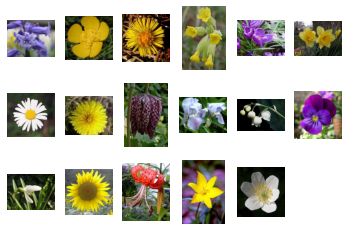

In [ ]:
#create a figure and display the categories names and corresponding image
fig = plt.figure()
ax1 = fig.add_subplot(3,6,1)
ax1.axis('off')
ax1.imshow(im_Bluebell)
print("Bluebell")

ax2 = fig.add_subplot(3,6,2)
ax2.axis('off')
ax2.imshow(im_Buttercup)
print("Buttercup")

ax2 = fig.add_subplot(3,6,3)
ax2.axis('off')
ax2.imshow(im_ColtsFoot)
print("ColtsFoot")

ax2 = fig.add_subplot(3,6,4)
ax2.axis('off')
ax2.imshow(im_Cowslip)
print("Cowslip")

ax2 = fig.add_subplot(3,6,5)
ax2.axis('off')
ax2.imshow(im_Crocus)
print("Crocus")

ax2 = fig.add_subplot(3,6,6)
ax2.axis('off')
ax2.imshow(im_Daffodil)
print("Daffodil")

ax2 = fig.add_subplot(3,6,7)
ax2.axis('off')
ax2.imshow(im_Daisy)
print("Daisy")

ax2 = fig.add_subplot(3,6,8)
ax2.axis('off')
ax2.imshow(im_Dandelion)
print("Dandelion")

ax2 = fig.add_subplot(3,6,9)
ax2.axis('off')
ax2.imshow(im_Fritillary)
print("Fritillary")

ax2 = fig.add_subplot(3,6,10)
ax2.axis('off')
ax2.imshow(im_Iris)
print("Iris")

ax2 = fig.add_subplot(3,6,11)
ax2.axis('off')
ax2.imshow(im_LilyValley)
print("LillyValley")

ax2 = fig.add_subplot(3,6,12)
ax2.axis('off')
ax2.imshow(im_Pansy)
print("Pansy")

ax2 = fig.add_subplot(3,6,13)
ax2.axis('off')
ax2.imshow(im_Snowdrop)
print("Snowdrop")

ax2 = fig.add_subplot(3,6,14)
ax2.axis('off')
ax2.imshow(im_Sunflower)
print("Sunflower")

ax2 = fig.add_subplot(3,6,15)
ax2.axis('off')
ax2.imshow(im_Tigerlily)
print("Tigerlily")

ax2 = fig.add_subplot(3,6,16)
ax2.axis('off')
ax2.imshow(im_Tulip)
print("Tulip")

ax2 = fig.add_subplot(3,6,17)
ax2.axis('off')
ax2.imshow(im_Windflower)
print("Windflower")

##Design AlexNet Architecture

In [ ]:
model_alex = tf.keras.models.Sequential([
    #Conv_1        
    tf.keras.layers.Conv2D(96, (11,11),strides=4, padding='valid', activation='relu', input_shape=(227, 227, 3)),
    # Pooling_1
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    # Batch Normalisation_1
    tf.keras.layers.BatchNormalization(),
    # Conv_2
    tf.keras.layers.Conv2D(256, (11,11),strides=1, padding='valid', activation='relu'),
    # Pooling_2
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalisation_2
    tf.keras.layers.BatchNormalization(),
    # Conv_3
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    # Conv_4
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    #conv_5
    tf.keras.layers.Conv2D(256, (3,3),strides=1, padding='valid', activation='relu'),
    #pooling_3
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalization_4
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    #Dense layer_1
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_2
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_3
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(17, activation='softmax')
    ])

In [ ]:
model_alex.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/model_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

##Customize AlexNet Architecture for the CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11,11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
                                    tf.keras.layers.MaxPooling2D(3, 3),
                                    tf.keras.layers.Conv2D(256, (5,5), strides=(1, 1), padding = 'same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(3, 3),
                                    tf.keras.layers.Conv2D(384, (3,3), strides=(1, 1), padding = 'same', activation='relu'),
                                    tf.keras.layers.Conv2D(256, (3,3), strides=(1, 1), padding = 'same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(3, 3),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(4096, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4096, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1000, activation='relu'),
                                    tf.keras.layers.Dense(17, activation='softmax')    
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/model_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

##Training AlexNet and Customized AlexNet

In [ ]:
#AlexNet training
history = model_alex.fit(train_gen,
      steps_per_epoch=47,  # 952 images = batch_size * steps
      validation_data=val_gen,
      validation_steps=10,  # 204 images = batch_size * steps
      #callbacks = [checkpoint],
      verbose=2,
      epochs=25)

Epoch 1/25
47/47 - 163s - loss: 3.1952 - acc: 0.1245 - val_loss: 2.8310 - val_acc: 0.0550 - 163s/epoch - 3s/step
Epoch 2/25
47/47 - 158s - loss: 2.7410 - acc: 0.1974 - val_loss: 2.8519 - val_acc: 0.0550 - 158s/epoch - 3s/step
Epoch 3/25
47/47 - 158s - loss: 2.5206 - acc: 0.2521 - val_loss: 2.9921 - val_acc: 0.0600 - 158s/epoch - 3s/step
Epoch 4/25
47/47 - 157s - loss: 2.2681 - acc: 0.3165 - val_loss: 2.9362 - val_acc: 0.0600 - 157s/epoch - 3s/step
Epoch 5/25
47/47 - 157s - loss: 2.2212 - acc: 0.3230 - val_loss: 2.9095 - val_acc: 0.0850 - 157s/epoch - 3s/step
Epoch 6/25
47/47 - 157s - loss: 2.0601 - acc: 0.3541 - val_loss: 2.5412 - val_acc: 0.1750 - 157s/epoch - 3s/step
Epoch 7/25
47/47 - 158s - loss: 1.9893 - acc: 0.3734 - val_loss: 2.3426 - val_acc: 0.2600 - 158s/epoch - 3s/step
Epoch 8/25
47/47 - 158s - loss: 1.9181 - acc: 0.4292 - val_loss: 2.1473 - val_acc: 0.3050 - 158s/epoch - 3s/step
Epoch 9/25
47/47 - 156s - loss: 1.8021 - acc: 0.4399 - val_loss: 2.3064 - val_acc: 0.3150 - 156s

In [ ]:
#Customised AlexNet training
history = model.fit(train_gen,
      steps_per_epoch=47,  # 952 images = batch_size * steps
      validation_data=val_gen,
      validation_steps=10,  # 204 images = batch_size * steps
      #callbacks = [checkpoint],
      verbose=2,
      epochs=25)

Epoch 1/25
47/47 - 580s - loss: 2.7623 - acc: 0.0697 - val_loss: 2.4197 - val_acc: 0.1350 - 580s/epoch - 12s/step
Epoch 2/25
47/47 - 66s - loss: 2.4611 - acc: 0.1406 - val_loss: 2.4209 - val_acc: 0.1350 - 66s/epoch - 1s/step
Epoch 3/25
47/47 - 67s - loss: 2.3813 - acc: 0.1534 - val_loss: 2.3993 - val_acc: 0.1650 - 67s/epoch - 1s/step
Epoch 4/25
47/47 - 67s - loss: 2.2087 - acc: 0.1979 - val_loss: 2.0644 - val_acc: 0.1550 - 67s/epoch - 1s/step
Epoch 5/25
47/47 - 67s - loss: 2.0330 - acc: 0.2725 - val_loss: 2.0697 - val_acc: 0.3200 - 67s/epoch - 1s/step
Epoch 6/25
47/47 - 67s - loss: 1.8614 - acc: 0.3315 - val_loss: 1.7725 - val_acc: 0.3300 - 67s/epoch - 1s/step
Epoch 7/25
47/47 - 67s - loss: 1.6883 - acc: 0.3895 - val_loss: 1.5729 - val_acc: 0.4800 - 67s/epoch - 1s/step
Epoch 8/25
47/47 - 68s - loss: 1.5414 - acc: 0.4624 - val_loss: 1.6597 - val_acc: 0.4500 - 68s/epoch - 1s/step
Epoch 9/25
47/47 - 68s - loss: 1.4005 - acc: 0.5000 - val_loss: 1.6784 - val_acc: 0.4000 - 68s/epoch - 1s/ste

##Save and Reload Checkpoint For Models

In [ ]:
#Save the latest AlexNet checkpoint
model_alex.save_weights('./checkpoints/my_checkpoint_alex')

In [ ]:
#Load the saved checkpoint
model_alex.load_weights('./checkpoints/my_checkpoint_alex')

In [ ]:
#Save the latest customised AlexNet checkpoint
model.save_weights('./checkpoints/my_checkpoint_last')

In [ ]:
#Load the saved checkpoint
model.load_weights('./checkpoints/my_checkpoint_last')

##Evaluate models on test data set

In [ ]:
#Evaluate the accuracy for the customised AlexNet model
loss, acc = model.evaluate(test_gen, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

11/11 - 93s - loss: 1.4813 - acc: 0.6520 - 93s/epoch - 8s/step
Restored model, accuracy: 65.20%


In [ ]:
#Evaluate the accuracy for the AlexNet model
loss_alex, acc_alex = model_alex.evaluate(test_gen, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc_alex))

11/11 - 10s - loss: 2.3095 - acc: 0.5000 - 10s/epoch - 906ms/step
Restored model, accuracy: 50.00%


##Customised AlexNet Training

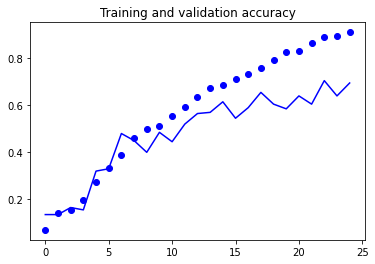

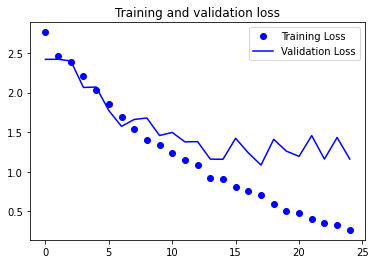

In [ ]:
#Plot the acccuracy and loss for the Customised AlexNet Training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##AlexNet Training

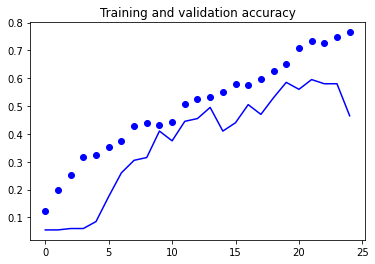

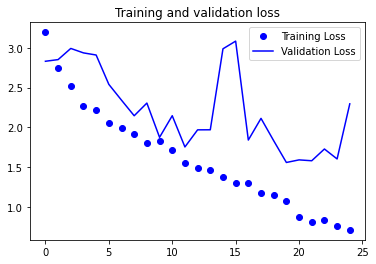

In [ ]:
#Plot the acccuracy and loss for the AlexNet Training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Evaluation of model

In [ ]:
#summary of the AlexNet model
model_alex.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [ ]:
#summary of the customised AlexNet Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 256)         8

In [ ]:
#Get class names from folders 
from glob import glob
class_names = glob("FlowerSplitData/train" + "/*", recursive=True) # Reads all the folders in which images are present
class_names = ' '.join(class_names).replace('FlowerSplitData/train/','').split()
class_names = sorted(class_names) # Sorting them
name_id_map = dict(zip(class_names, range(len(class_names))))

{'Bluebell': 0, 'Buttercup': 1, 'ColtsFoot': 2, 'Cowslip': 3, 'Crocus': 4, 'Daffodil': 5, 'Daisy': 6, 'Dandelion': 7, 'Fritillary': 8, 'Iris': 9, 'LilyValley': 10, 'Pansy': 11, 'Snowdrop': 12, 'Sunflower': 13, 'Tigerlily': 14, 'Tulip': 15, 'Windflower': 16}
[14]


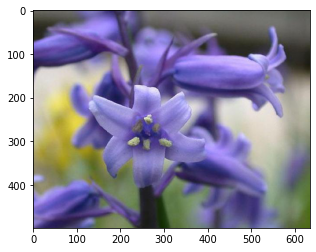

correct prediction: 0


In [ ]:
#Plot attempted classification of the Bluebell flower
#classification done by the customised AlexNet model
import cv2
import numpy as np
show_image = Image.open("FlowerSplitData/train/Bluebell/image_0241.jpg")

img = cv2.imread('FlowerSplitData/train/Bluebell/image_0270.jpg')
img = cv2.resize(img,(227,227))
img = np.reshape(img,[1,227,227,3])

pred = model.predict(img)

y_classes = pred.argmax(axis=-1)

print(name_id_map)
print(y_classes)

plt.figure()
plt.imshow(show_image) 
plt.show() 
print("correct prediction: 0")

{'Bluebell': 0, 'Buttercup': 1, 'ColtsFoot': 2, 'Cowslip': 3, 'Crocus': 4, 'Daffodil': 5, 'Daisy': 6, 'Dandelion': 7, 'Fritillary': 8, 'Iris': 9, 'LilyValley': 10, 'Pansy': 11, 'Snowdrop': 12, 'Sunflower': 13, 'Tigerlily': 14, 'Tulip': 15, 'Windflower': 16}
[6]


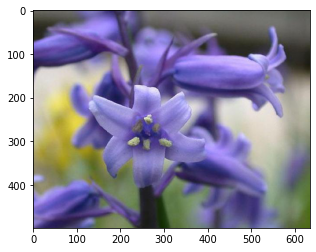

correct prediction: 0


In [ ]:
#Plot attempted classification of the Bluebell flower
#classification done by the AlexNet model
import cv2
import numpy as np
show_image = Image.open("FlowerSplitData/train/Bluebell/image_0241.jpg")

img = cv2.imread('FlowerSplitData/train/Bluebell/image_0270.jpg')
img = cv2.resize(img,(227,227))
img = np.reshape(img,[1,227,227,3])

pred = model_alex.predict(img)

y_classes = pred.argmax(axis=-1)

print(name_id_map)
print(y_classes)

plt.figure()
plt.imshow(show_image) 
plt.show() 
print("correct prediction: 0")